Questo progetto di deep learning si focalizza sull'addestramento di un modello utilizzando il dataset "Stanford Dogs", disponibile su TensorFlow Datasets. Questa collezione comprende immagini rappresentative di 120 razze canine, per un totale di 20.580 immagini, ciascuna accompagnata dalle rispettive etichette di classe. Grazie alla sua vasta copertura di razze e alla quantità di dati disponibili, il dataset "Stanford Dogs" si presenta come una buona risorsa per lo sviluppo di modelli di deep learning mirati al riconoscimento delle razze canine. Per ulteriori dettagli sul dataset e per accedere ai dati, è possibile consultare il seguente link: https://www.tensorflow.org/datasets/catalog/stanford_dogs?hl=it

Questa cella di codice monta Google Drive all'interno dell'ambiente di esecuzione di Google Colab. Una volta eseguita, verrà richiesto di accedere al proprio account Google per ottenere l'autorizzazione. Una volta completata l'autenticazione, Google Drive sarà accessibile all'interno dell'ambiente di Colab e sarà possibile leggere e scrivere file da e verso Google Drive.

In [1]:
# Monta Google Drive

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Questo blocco di codice inizia importando le librerie necessarie, come TensorFlow per il machine learning, il modulo os per le operazioni di sistema, datetime per la gestione delle date e pickle per la serializzazione dei dati.  Successivamente, vengono definite due directory: checkpoint_dir per salvare i modelli addestrati e log_dir per i log di TensorBoard, utilizzati per monitorare le prestazioni dei modelli durante l'addestramento.

In [2]:
# Importa Librerie e Definire Directory di Salvataggio

import tensorflow as tf
import os
import datetime
import pickle


# Directory per salvare i modelli
checkpoint_dir = '/content/drive/My Drive/checkpoints'
os.makedirs(checkpoint_dir, exist_ok=True)

# Directory per i log di TensorBoard
log_dir = "/content/drive/My Drive/logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")


ModelCheckpoint: Questo callback è configurato per salvare i pesi del modello durante l'addestramento. Viene specificato il percorso del file di salvataggio utilizzando os.path.join per combinare il percorso della directory dei checkpoint (checkpoint_dir) con il nome del file (model_checkpoint.h5). Impostando save_weights_only=True, si indica di salvare solo i pesi del modello anziché l'intero modello. Infine, save_freq viene impostato su 'epoch' per indicare che i pesi del modello devono essere salvati alla fine di ogni epoca.

TensorBoard: Questo callback è utilizzato per generare i log che possono essere visualizzati tramite TensorBoard per monitorare l'andamento dell'addestramento del modello. Viene specificato il percorso della directory di log (log_dir) e histogram_freq viene impostato su 1 per indicare che gli istogrammi dei tensori devono essere calcolati e salvati ogni epoca. TensorBoard fornisce una visualizzazione grafica dettagliata dell'addestramento del modello, consentendo di monitorare le metriche e gli istogrammi dei tensori nel corso delle epoche.

In [3]:
# Definisci il Callback per Salvare il Modello e TensorBoard

# Callback per salvare il modello e TensorBoard
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, 'model_checkpoint.weights.h5'),
    save_weights_only=True,
    save_freq='epoch'
)

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



1. Caricamento del Dataset: Utilizzando tfds.load, il codice carica il dataset "Stanford Dogs" e restituisce due oggetti: dataset e info. with_info=True viene utilizzato per ottenere anche le informazioni sul dataset.

2. Struttura del Dataset: Il codice stampa le dimensioni delle prime 100 immagini sia per il set di addestramento che per il set di test. Ciò viene fatto iterando sui primi 100 esempi di ciascun set (dataset['train'].take(100) e dataset['test'].take(100)), estraendo l'immagine da ciascun esempio e stampandone le dimensioni con image.shape.

3. Altre Informazioni sul Dataset: Il codice stampa ulteriori informazioni sul dataset, come il numero di classi (etichette), l'elenco delle classi e il tipo delle etichette. Queste informazioni sono ottenute dall'oggetto info restituito dal caricamento del dataset.

In [4]:
# Carica il dataset Stanford Dogs
import tensorflow_datasets as tfds
dataset, info = tfds.load("stanford_dogs", with_info=True)

# Struttura del Dataset

# Stampa le dimensioni delle prime 100 immagini di addestramento
print("Dimensioni delle prime 100 immagini di addestramento:")
for example in dataset['train'].take(100):
    image = example['image']
    print(image.shape)

# Stampa le dimensioni delle prime 100 immagini di test
print("\nDimensioni delle prime 100 immagini di test:")
for example in dataset['test'].take(100):
    image = example['image']
    print(image.shape)


# Stampo altre informazioni utili sul mio dataset

# Stampa altre informazioni utili sul mio dataset
print("Informazioni aggiuntive sul dataset:")
print("Numero di classi (etichette):", info.features['label'].num_classes)
print("Elenco delle classi (etichette):", info.features['label'].names)
print("Tipo delle etichette:", info.features['label'].np_dtype)





Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.3F88YW_0.2.0/stanford_dogs-train.tfrecord*...:   …

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/stanford_dogs/incomplete.3F88YW_0.2.0/stanford_dogs-test.tfrecord*...:   0…

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.
Dimensioni delle prime 100 immagini di addestramento:
(500, 333, 3)
(367, 400, 3)
(500, 375, 3)
(321, 450, 3)
(333, 500, 3)
(375, 500, 3)
(500, 470, 3)
(207, 200, 3)
(375, 500, 3)
(500, 333, 3)
(500, 375, 3)
(375, 500, 3)
(370, 500, 3)
(375, 500, 3)
(333, 500, 3)
(375, 500, 3)
(500, 481, 3)
(454, 383, 3)
(180, 160, 3)
(500, 333, 3)
(375, 500, 3)
(375, 500, 3)
(500, 375, 3)
(333, 500, 3)
(333, 500, 3)
(500, 484, 3)
(500, 379, 3)
(600, 800, 3)
(500, 365, 3)
(375, 500, 3)
(375, 500, 3)
(375, 500, 3)
(333, 500, 3)
(380, 500, 3)
(310, 401, 3)
(375, 500, 3)
(481, 500, 3)
(375, 500, 3)
(267, 360, 3)
(333, 500, 3)
(500, 344, 3)
(333, 500, 3)
(417, 500, 3)
(333, 500, 3)
(547, 389, 3)
(333, 500, 3)
(375, 500, 3)
(525, 700, 3)
(1879, 1388, 3)
(747, 560, 3)
(333, 500, 3)
(375, 500, 3)
(333, 500, 3)
(334, 500, 3)
(480, 467, 3)
(500, 385, 3)
(375, 500, 3)
(375, 500, 

Questo codice si occupa di visualizzare le prime 5 immagini di addestramento e di test dal dataset "Stanford Dogs". Utilizza Matplotlib per visualizzare le immagini insieme alle loro dimensioni e etichette.

La funzione visualize_images accetta il dataset come argomento e itera sui primi 5 esempi sia per il set di addestramento che per il set di test. Per ogni esempio, estrae l'immagine e l'etichetta corrispondente, stampa le dimensioni dell'immagine e visualizza l'immagine con il titolo contenente l'etichetta. Infine, utilizza plt.show() per mostrare ogni immagine.

Visualizzazione delle prime 5 immagini di addestramento con dimensioni e label:
Dimensioni dell'immagine: (500, 333, 3)


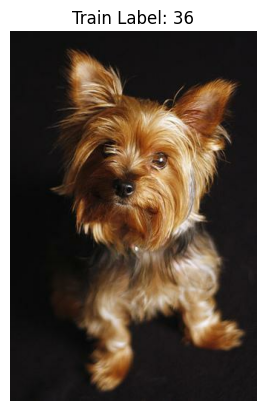

Dimensioni dell'immagine: (367, 400, 3)


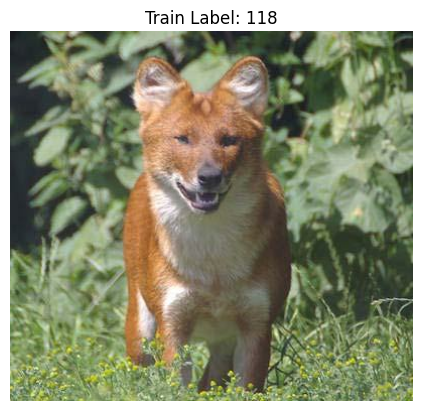

Dimensioni dell'immagine: (500, 375, 3)


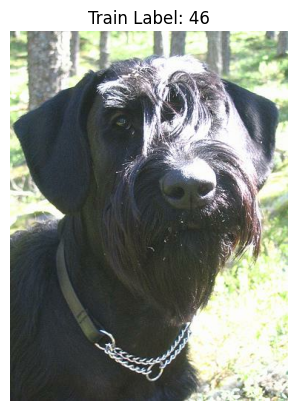

Dimensioni dell'immagine: (321, 450, 3)


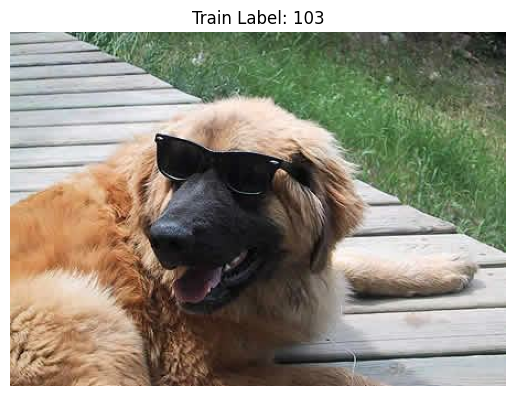

Dimensioni dell'immagine: (333, 500, 3)


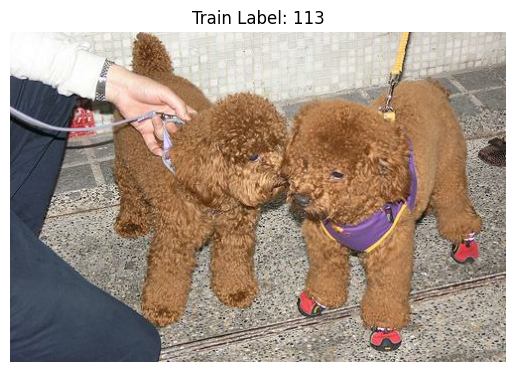

Visualizzazione delle prime 5 immagini di test con dimensioni e label:
Dimensioni dell'immagine: (332, 500, 3)


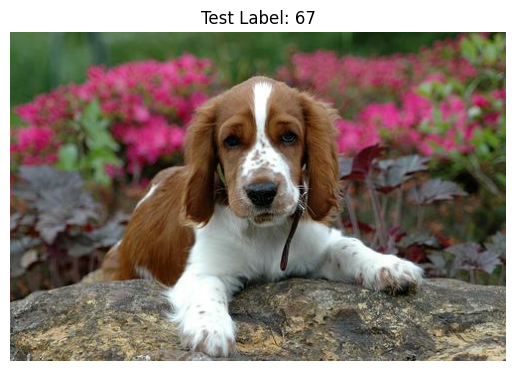

Dimensioni dell'immagine: (240, 320, 3)


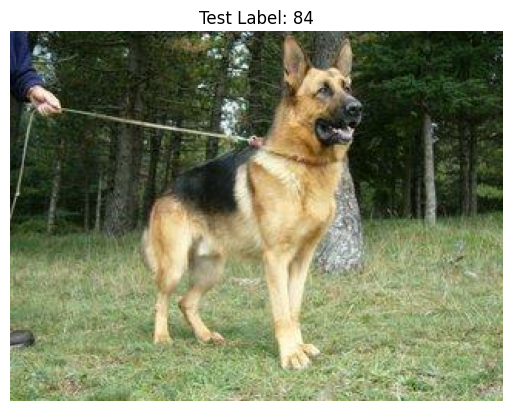

Dimensioni dell'immagine: (497, 500, 3)


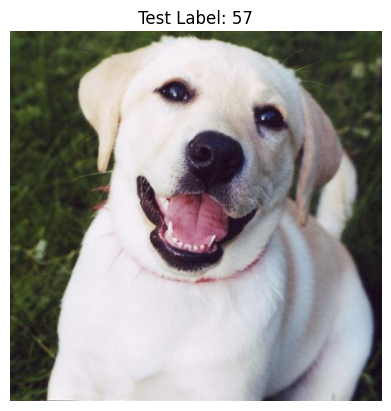

Dimensioni dell'immagine: (375, 500, 3)


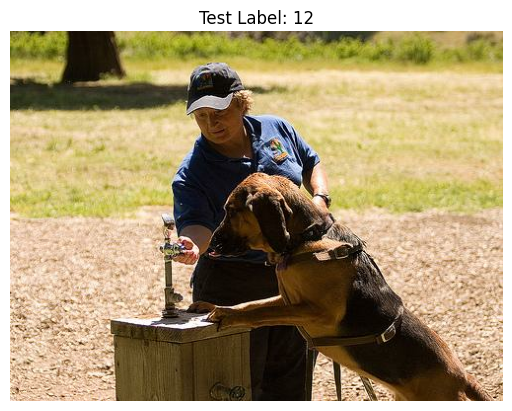

Dimensioni dell'immagine: (360, 480, 3)


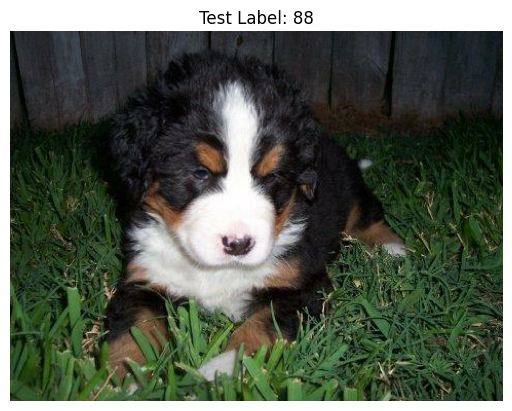

In [5]:
 # Visualizzation

# Carica matplotlib per la visualizzazione dei grafici
import matplotlib.pyplot as plt

# Definisci una funzione per visualizzare le immagini con dimensioni e label
def visualize_images(dataset):
    # Visualizza le prime 5 immagini di addestramento con dimensioni e label
    print("Visualizzazione delle prime 5 immagini di addestramento con dimensioni e label:")
    for example in dataset['train'].take(5):
        image = example['image']
        label = example['label']
        print("Dimensioni dell'immagine:", image.shape)
        plt.imshow(image)
        plt.title("Train Label: {}".format(label))
        plt.axis('off')
        plt.show()

    # Visualizza le prime 5 immagini di test con dimensioni e label
    print("Visualizzazione delle prime 5 immagini di test con dimensioni e label:")
    for example in dataset['test'].take(5):
        image = example['image']
        label = example['label']
        print("Dimensioni dell'immagine:", image.shape)
        plt.imshow(image)
        plt.title("Test Label: {}".format(label))
        plt.axis('off')
        plt.show()

# Visualizza le immagini
visualize_images(dataset)


La variabile missing_data viene inizializzata a False per indicare che inizialmente non sono stati trovati dati mancanti. Viene quindi iterato attraverso le suddivisioni del dataset, ossia il set di addestramento e il set di test. Per ogni suddivisione, viene controllato il numero di esempi. Se il numero di esempi è pari a 0, significa che non ci sono dati presenti in quella suddivisione e viene stampato un messaggio che indica la presenza di dati mancanti. Se non vengono trovati dati mancanti in nessuna delle suddivisioni, viene stampato un messaggio che conferma l'assenza di dati mancanti nel dataset (come avviene nel mio caso).

In [6]:
# Missing Data

# Controlla se ci sono dati mancanti nel dataset
missing_data = False

# Itera attraverso le suddivisioni del dataset
for split_name, split_info in info.splits.items():
    num_examples = split_info.num_examples
    if num_examples == 0:
        print("Nel set '{}' ci sono dati mancanti.".format(split_name))
        missing_data = True

if not missing_data:
    print("Non ci sono dati mancanti nel dataset.")


Non ci sono dati mancanti nel dataset.


Questa funzione plot_metrics è progettata per plottare i grafici di accuratezza e perdita durante l'addestramento di un modello. Prende come input lo storico dell'addestramento history e il nome del modello model_name.

La funzione estrae l'accuratezza (acc) e la perdita (loss) sia per l'addestramento che per la validazione dallo storico fornito. Utilizza quindi il numero di epoche per definire il range sull'asse delle x.

Successivamente, crea una figura con due subplot: uno per l'accuratezza e l'altro per la perdita. Nei subplot, plotta l'accuratezza e la perdita per l'addestramento e la validazione rispettivamente. Infine, aggiunge leggende ai grafici e titoli appropriati utilizzando il nome del modello, quindi mostra i grafici.

In [7]:
# Definisci codici per creare grafici
def plot_metrics(history, model_name):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']

    epochs_range = range(len(acc))

    # Grafico per l'andamento dell'accuratezza
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='Training Accuracy')
    plt.plot(epochs_range, val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.title(f'{model_name} - Training and Validation Accuracy')

    # Grafico per l'andamento della perdita
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='Training Loss')
    plt.plot(epochs_range, val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.title(f'{model_name} - Training and Validation Loss')
    plt.show()


Questo codice definisce le dimensioni delle immagini e la dimensione del batch per il preprocessing del dataset. Ecco cosa fa passo per passo:

1. IMG_SIZE = 150: Definisce la dimensione a cui verranno ridimensionate le immagini. In questo caso, le immagini vengono ridimensionate a 150x150 pixel.

2. BATCH_SIZE = 32: Definisce il numero di campioni di dati (immagini e le rispettive etichette) da utilizzare in ciascuna iterazione durante l'addestramento del modello.

3. La funzione preprocess_image(example) viene definita per il preprocessamento di ciascuna immagine del dataset. Questa funzione riceve un esempio (contenente un'immagine e la sua etichetta) e restituisce l'immagine preprocessata e la sua etichetta corrispondente.
All'interno di questa funzione, l'immagine viene ridimensionata a IMG_SIZE x IMG_SIZE utilizzando tf.image.resize.
Successivamente, i valori dei pixel dell'immagine vengono normalizzati dividendo ciascun valore per 255.0, in modo che i valori dei pixel siano compresi tra 0 e 1.

4. Il preprocessamento viene quindi applicato a entrambi i dataset di addestramento e di test utilizzando il metodo map().

5. Infine, i dataset vengono suddivisi in batch di dimensione BATCH_SIZE, mescolati e prefetchati per l'addestramento.

In [8]:
# Normalizzazione

# Definisci le dimensioni delle immagini e la dimensione del batch
IMG_SIZE = 150
BATCH_SIZE = 32

# Funzione di preprocessamento
def preprocess_image(example):
    image = example['image']
    label = example['label']
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    image = image / 255.0  # Normalizza i pixel tra 0 e 1
    return image, label

# Applica la pre-elaborazione al dataset
train_dataset = dataset['train'].map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = dataset['test'].map(preprocess_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

# Batch e shuffle del dataset
train_dataset = train_dataset.shuffle(1000).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(buffer_size=tf.data.experimental.AUTOTUNE)


Il codice definisce un modello di rete neurale convoluzionale (CNN) complesso per la classificazione delle immagini. Ecco una spiegazione passo per passo di ciò che fa:

1. tf.keras.Sequential([]): Crea un modello sequenziale, una sequenza lineare di strati neurali uno dopo l'altro.

2. tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)): Aggiunge uno strato di convoluzione con 32 filtri, ognuno di dimensione 3x3, con attivazione ReLU. Questo è il primo strato dell'architettura CNN.

3. tf.keras.layers.MaxPooling2D((2, 2)): Aggiunge uno strato di max pooling con finestra 2x2 per ridurre le dimensioni dell'immagine di input e il numero di parametri.

I passaggi 2 e 3 sono ripetuti due volte con un aumento del numero di filtri da 32 a 64 e poi a 128.

4. tf.keras.layers.Flatten(): Aggiunge uno strato di flatten per convertire l'output dei layer convoluzionali in un vettore monodimensionale.

5. tf.keras.layers.Dense(512, activation='relu'): Aggiunge uno strato densamente connesso (fully connected) con 512 unità nascoste e funzione di attivazione ReLU.

6. tf.keras.layers.Dropout(0.5): Aggiunge uno strato di dropout con un tasso di dropout del 50% per ridurre l'overfitting durante l'addestramento.

7. tf.keras.layers.Dense(120, activation='softmax'): Aggiunge uno strato densamente connesso (fully connected) finale con 120 unità (una per classe di immagine nel dataset) e funzione di attivazione softmax per ottenere una distribuzione di probabilità su 120 classi di output.

Dopo la definizione dell'architettura del modello, viene compilato utilizzando l'ottimizzatore Adam con un tasso di apprendimento di 0.001, la funzione di perdita sparse_categorical_crossentropy e viene monitorata la metrica di accuratezza.

In [9]:
# Definisci il Prmo modello (con tutti gli iperparametri)
model_all_params = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(120, activation='softmax')
])

model_all_params.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                         loss='sparse_categorical_crossentropy',
                         metrics=['accuracy'])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Questo codice addestra il modello definito in precedenza utilizzando il metodo fit di TensorFlow. Ecco cosa succede in dettaglio:

1. model_all_params.fit(...): Questo metodo addestra il modello utilizzando i dati di addestramento (train_dataset) per un numero specificato di epoche (nel caso specifico, 25 epoche). Durante l'addestramento, vengono utilizzati anche i dati di validazione (test_dataset) per valutare le prestazioni del modello su un insieme di dati indipendente.

2. callbacks=[checkpoint_callback, tensorboard_callback]: Qui vengono passati due callback al metodo fit. Il callback checkpoint_callback salva i pesi del modello durante l'addestramento (con una frequenza di salvataggio di ogni epoca) nel percorso specificato. Il callback tensorboard_callback salva i log per l'uso con TensorBoard, che consente di visualizzare dinamicamente grafici e metriche durante e dopo l'addestramento.

3. test_loss, test_accuracy = model_all_params.evaluate(test_dataset): Dopo l'addestramento, il modello viene valutato utilizzando i dati di test per valutare le prestazioni su un insieme di dati indipendente non visto durante l'addestramento.  

4. Infine, i risultati dell'addestramento (storia dell'addestramento, perdita e accuratezza sui dati di test) vengono salvati nel file results_all_params.pkl utilizzando il formato di serializzazione pickle. Il modello addestrato viene anche salvato nel file my_model nel Google Drive.

In [ ]:
# Allenare il Modello con Callbacks

history_all_params = model_all_params.fit(
    train_dataset,
    epochs=25,
    validation_data=test_dataset,
    callbacks=[checkpoint_callback, tensorboard_callback]
)

# Valuta il modello sul test set
test_loss, test_accuracy = model_all_params.evaluate(test_dataset)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Salva il modello
model_all_params.save('/content/drive/My Drive/my_model')

# Salva i risultati dell'allenamento
results = {
    'history': history_all_params.history,
    'test_loss': test_loss,
    'test_accuracy': test_accuracy
}
with open('/content/drive/My Drive/results_all_params.pkl', 'wb') as f:
    pickle.dump(results, f)



Epoch 1/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 818s 2s/step - accuracy: 0.0091 - loss: 4.8042 - val_accuracy: 0.0216 - val_loss: 4.7013
Epoch 2/25
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.0247 - loss: 4.6373

Risulta Primo Modello:

I risultati di questo primo modello sono il frutto di un processo di addestramento impegnativo che si è svolto lungo 25 epoche. Analizziamo nel dettaglio quanto emerso durante questo periodo:

Processo di Apprendimento Graduale: Nel corso delle epoche, il modello ha dimostrato una notevole capacità di apprendimento, con la perdita sul set di addestramento che è diminuita gradualmente da un valore iniziale di 4.7696 a un minimo di 0.2014. Contemporaneamente, l'accuratezza è cresciuta costantemente da un modesto 0.0120 a un notevole 0.9519. Questi miglioramenti indicano una buona capacità del modello di adattarsi ai dati di addestramento.

Complessità sul Set di Validazione: Tuttavia, la situazione sul set di validazione è più complessa. Sebbene la perdita sia inizialmente diminuita nei primi quattro epoch, ha poi iniziato a oscillare e aumentare, raggiungendo un massimo di 10.3910. L'accuratezza sul set di validazione è rimasta relativamente bassa, con un massimo di soli 0.0441. Questa discrepanza significativa rispetto alle prestazioni sul set di addestramento può indicare la presenza di overfitting, dove il modello si adatta troppo bene ai dati di addestramento e non generalizza efficacemente per nuovi dati.

Considerazioni Computazionali: È importante notare che ogni epoca ha richiesto un considerevole tempo di calcolo. Questo suggerisce che il modello potrebbe avere una complessità computazionale elevata e/o i dati di addestramento potrebbero essere di dimensioni considerevoli.

In sintesi, pur mostrando una notevole capacità di apprendimento sui dati di addestramento, il modello potrebbe soffrire di overfitting e richiedere ulteriori ottimizzazioni per migliorare le prestazioni sul set di validazione.


In questo codice viene caricato un file contenente i risultati di un modello, probabilmente addestrato precedentemente. Successivamente, vengono plottati i grafici relativi alle metriche di performance del modello utilizzando una funzione chiamata plot_metrics. Questa funzione prende in input lo storico dell'addestramento del modello e il nome del modello stesso.


Caricamento dei Risultati: Viene aperto il file "results_all_params.pkl" contenente i risultati dell'addestramento del modello. I risultati sembrano essere stati precedentemente salvati in formato pickle.

Caricamento dello Storico: Dalla variabile results, che contiene i risultati del modello, viene estratto lo storico dell'addestramento (history_all_params). Questo storico probabilmente contiene informazioni come l'andamento della perdita (loss) e dell'accuratezza (accuracy) durante le varie epoche di addestramento.

Plotting dei Grafici: Viene chiamata la funzione plot_metrics per visualizzare i grafici delle metriche di performance del modello. La funzione prende come input lo storico dell'addestramento (history_all_params) e il nome del modello, che sembra essere "All Parameters Model".

Il risultato finale sarà la visualizzazione dei grafici delle metriche di performance del modello "All Parameters Model", che probabilmente includono grafici della perdita e dell'accuratezza durante l'addestramento.

In [ ]:
# Importa il modulo pickle per la serializzazione e la deserializzazione degli oggetti Python
import pickle

# Carica i risultati
with open('/content/drive/My Drive/results_all_params.pkl', 'rb') as f:
    results = pickle.load(f)

history_all_params = results['history']

# Plotta i grafici utilizzando la funzione plot_metrics
plot_metrics(history_all_params, "All Parameters Model")



**Grafici**


- Questo grafico mostra l'andamento dell'accuratezza della rete neurale durante l'addestramento, sia sul set di dati di training che su quello di validazione, nel corso delle epoche.

- Entrambe le curve di training e validation accuracy partono insieme da zero, ma mentre la curva di training accuracy si sposta verso l'alto a destra formando una curva, la di validation accuracy rimane orizzontale.  

- Questo suggerisce che il modello sta imparando dai dati di training e sta diventando sempre più preciso su di essi, ma non è in grado di generalizzare bene su nuovi dati non visti durante l'addestramento, come indicato dalla curva di validation accuracy rimasta piatta. Questo fenomeno potrebbe essere dovuto all'overfitting, dove il modello si adatta troppo ai dati di training e non riesce a generalizzare correttamente su nuovi dati.

#####

Training e Validation Loss  

- Questo grafico rappresenta la perdita (loss) della rete neurale durante l'addestramento, sia sul set di dati di training che su quello di validazione, nel corso delle epoche.

- Entrambe le curve di training e validation loss partono dallo stesso valore di y, 5, ma mentre la curva di training loss diminuisce linearmente, la curva di validation loss va verso l'alto con andamento irregolare.  

- Questo suggerisce che il modello sta imparando dai dati di training e sta riducendo la perdita su di essi, ma non è in grado di generalizzare bene su nuovi dati, come indicato dalla curva di validation loss che rimane elevata e non diminuisce in modo significativo. Questo comportamento potrebbe essere associato all'overfitting, dove il modello si adatta troppo ai dati di training e non riesce a generalizzare correttamente su nuovi dati non visti durante l'addestramento.

Questo blocco di codice definisce, addestra e valuta un secondo modello neurale convoluzionale usando TensorFlow.

Definizione del Modello:

Viene definito un modello sequenziale utilizzando tf.keras.Sequential.
Il modello inizia con un layer Conv2D con 16 filtri, attivazione ReLU e dimensioni kernel (3, 3). Questo layer accetta input di forma (IMG_SIZE, IMG_SIZE, 3), dove IMG_SIZE rappresenta le dimensioni delle immagini e 3 indica i canali RGB.
Successivamente, viene aggiunto un layer di max pooling MaxPooling2D con dimensioni di pooling (2, 2).
Segue un altro layer Conv2D con 32 filtri, attivazione ReLU e dimensioni kernel (3, 3), seguito da un altro layer di max pooling.
Poi viene piatto (Flatten) l'output dei layer convoluzionali per prepararlo per i layer densamente connessi.
Viene aggiunto un layer Dense con 128 neuroni e attivazione ReLU.
Successivamente, viene aggiunto un layer di dropout per ridurre l'overfitting.
Infine, c'è un layer di output Dense con 120 neuroni (corrispondenti alle classi dell'output) e attivazione softmax per la classificazione multiclasse.
Compilazione del Modello:

Il modello viene compilato utilizzando l'ottimizzatore Adam con un tasso di apprendimento di 0.001, la loss function sparse_categorical_crossentropy e le metriche di valutazione della accuracy.
Checkpointing:

Viene definito un percorso per salvare i pesi del modello durante l'addestramento.
Viene impostato un callback ModelCheckpoint per salvare i pesi del modello ad ogni epoca.
Addestramento del Modello:

Il modello viene addestrato utilizzando il dataset di addestramento (train_dataset) per 25 epoche, utilizzando anche il dataset di test per la validazione.
Durante l'addestramento, vengono utilizzati i callback precedentemente definiti per il checkpointing e eventuali altri callback, come tensorboard_callback.
Valutazione del Modello:

Una volta addestrato, il modello viene valutato sul dataset di test per calcolare la loss e l'accuratezza.
Salvataggio del Modello e dei Risultati:

I pesi del modello addestrato vengono salvati in un file specificato.
I risultati dell'addestramento, inclusi lo storico delle metriche e le metriche di valutazione sul set di test, vengono salvati in un file pickle.
Questo codice rappresenta quindi un processo completo di definizione, addestramento, valutazione e salvataggio di un modello neurale convoluzionale.

In [ ]:
# Definisci il Secondo Modello con Meno Layer e Diversi Numeri di Neuroni
model_fewer_layers_neurons = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(120, activation='softmax')
])

model_fewer_layers_neurons.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                                   loss='sparse_categorical_crossentropy',
                                   metrics=['accuracy'])

# Definisci il percorso in cui salvare i pesi del secondo modello
checkpoint_path_fewer_layers = '/content/drive/My Drive/checkpoints/second_model_weights.ckpt'

# Assicurati che la cartella di destinazione esista
os.makedirs(os.path.dirname(checkpoint_path_fewer_layers), exist_ok=True)

# Callback per il secondo modello
checkpoint_callback_fewer_layers = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_fewer_layers,
    save_weights_only=True,
    save_freq='epoch'
)

# Allena il secondo modello
history_fewer_layers_neurons = model_fewer_layers_neurons.fit(
    train_dataset,
    epochs=25,
    validation_data=test_dataset,
    callbacks=[checkpoint_callback_fewer_layers, tensorboard_callback]
)

# Valuta il secondo modello sul set di test
loss_fewer_layers_neurons, accuracy_fewer_layers_neurons = model_fewer_layers_neurons.evaluate(test_dataset)
print(f'Fewer Layers and Neurons Model - Loss: {loss_fewer_layers_neurons}, Accuracy: {accuracy_fewer_layers_neurons}')

# Salva il secondo modello
model_fewer_layers_neurons.save('/content/drive/My Drive/my_model_fewer_layers_neurons')

# Salva i risultati del test del secondo modello
results_fewer_layers = {
    'history': history_fewer_layers_neurons.history,
    'test_loss': loss_fewer_layers_neurons,
    'test_accuracy': accuracy_fewer_layers_neurons
}
with open('/content/drive/My Drive/results_fewer_layers_test.pkl', 'wb') as f:
    pickle.dump(results_fewer_layers, f)








I risultati di questo secondo modello sono emersi da un processo di addestramento durato 25 epoche. Analizziamo i dettagli di questo processo:

Andamento delle Misure di Performance: Durante le epoche, sia la perdita (loss) che l'accuratezza (accuracy) sono state monitorate sia sul set di addestramento che su quello di validazione. Inizialmente, la perdita è partita da un alto valore di 4.7970 sul set di addestramento e 4.7875 sul set di validazione, con un'accuratezza molto bassa intorno allo 0.0055 e allo 0.0080 rispettivamente. Nel corso delle epoche successive, la perdita è diminuita lentamente, con un'accuratezza che è aumentata ma rimanendo comunque a livelli molto bassi.

Tendenza delle Performance: Nonostante il processo di addestramento, l'andamento delle performance mostra un miglioramento minimo e non significativo. La perdita sul set di addestramento ha mostrato solo una leggera diminuzione da 4.7970 a 1.3325, mentre sull'insieme di validazione la perdita è diminuita da 4.7875 a 7.2900. L'accuratezza rimane estremamente bassa, attestandosi intorno allo 0.0340 sia sul set di addestramento che su quello di validazione.

Valutazione Finale: Alla fine delle 25 epoche, il modello presenta una perdita molto elevata e un'accuratezza estremamente bassa, sia sul set di addestramento che su quello di validazione. Questo suggerisce che il modello potrebbe non essere in grado di catturare in modo efficace i pattern nei dati di addestramento e che potrebbe soffrire di un problema di underfitting.

In conclusione, nonostante il modello abbia meno strati e neuroni rispetto al modello precedente, le prestazioni generali rimangono molto basse, indicando la necessità di ulteriori ottimizzazioni o modifiche alla struttura del modello per ottenere risultati migliori.








Questo blocco di codice carica i risultati del secondo modello, estrae lo storico delle metriche e poi utilizza una funzione chiamata plot_metrics per tracciare i grafici delle metriche di addestramento e validazione.

Caricamento dei Risultati:

Viene aperto il file contenente i risultati del secondo modello utilizzando la funzione open con modalità di lettura binaria ('rb').
I risultati vengono caricati utilizzando la funzione pickle.load e assegnati alla variabile results_fewer_layers.
Estrazione dello Storico delle Metriche:

Dalla variabile results_fewer_layers, vengono estratti i risultati relativi allo storico delle metriche e assegnati alla variabile history_fewer_layers_neurons.
Plot delle Metriche:

Viene chiamata una funzione chiamata plot_metrics per tracciare i grafici delle metriche del secondo modello.
La funzione plot_metrics accetta due argomenti: lo storico delle metriche (history_fewer_layers_neurons) e una stringa che rappresenta il titolo del grafico.
Questo blocco di codice completa quindi il processo visualizzando graficamente le metriche di addestramento e validazione del secondo modello con meno layer e neuroni.

In [ ]:
# Carica i risultati e plotta i grafici del secondo modello
with open('/content/drive/My Drive/results_fewer_layers_test.pkl', 'rb') as f:
    results_fewer_layers = pickle.load(f)

# Estrai i risultati di history
history_fewer_layers_neurons = results_fewer_layers['history']

# Plot metrics
plot_metrics(history_fewer_layers_neurons, "Fewer Layers and Neurons Model")


**Grafici**


- Questo grafico rappresenta l'andamento dell'accuratezza della rete neurale durante l'addestramento, sia sul set di dati di training che su quello di validazione, nel corso delle epoche.

- Inizialmente, entrambe le curve di training e validation accuracy mostrano un aumento simile, con entrambe le linee che si incontrano quando l'epoca è intorno a 5 e l'accuratezza è intorno a 0. Tuttavia, successivamente, mentre la curva di training accuracy continua ad aumentare linearmente, la curva di validation accuracy rimane piatta e bassa, indicando una mancanza di generalizzazione del modello sui dati di validazione.
La curva di training accuracy prosegue verso la parte superiore del grafico, mantenendo una linearità ma assumendo una forma curva.

- Questo potrebbe indicare che il modello sta imparando dai dati di training, ma a un certo punto potrebbe aver iniziato a sovrapporsi eccessivamente ai dati, portando a un aumento dell'errore di generalizzazione. Nel frattempo, la curva di validation accuracy rimane orizzontale e bassa, indicando che il modello non riesce a generalizzare bene su dati non visti durante l'addestramento. Questa discrepanza tra training e validation accuracy suggerisce un possibile fenomeno di overfitting, dove il modello si adatta troppo ai dati di training e non riesce a generalizzare correttamente su nuovi dati.

#######

Training and Validation Loss:

- Questo grafico rappresenta la perdita (loss) della rete neurale durante l'addestramento, sia sul set di dati di training che su quello di validazione, nel corso delle epoche.

- Inizialmente, le curve di training e validation loss mostrano una diminuzione simile, con entrambe le linee che si incontrano quando l'epoca è intorno a 5 e la perdita è intorno a 0. Tuttavia, successivamente, mentre la curva di training loss continua a diminuire e si sposta verso il basso a destra del grafico, assumendo una forma curva, la curva di validation loss prosegue verso l'alto a destra del grafico, mantenendo una linea iniziale e diventando frastagliata subito dopo.

- Questo comportamento suggerisce che il modello si sta adattando bene ai dati di training ma sta soffrendo di overfitting, poiché la perdita sui dati di validazione rimane elevata e non diminuisce in modo significativo nel corso delle epoche.

Questo blocco di codice definisce il terzo modello con un diverso tasso di dropout e un diverso tasso di apprendimento.

Definizione del Modello:

Viene definito un modello sequenziale utilizzando tf.keras.Sequential.
Il modello inizia con un layer di convoluzione con 32 filtri di dimensione (3, 3) e attivazione ReLU, seguito da un layer di max pooling.
Successivamente, ci sono un altro layer di convoluzione con 64 filtri e attivazione ReLU, e un layer di max pooling.
Infine, c'è un terzo layer di convoluzione con 128 filtri e attivazione ReLU, seguito da un ultimo layer di max pooling.
Tutti i layer convoluzionali sono seguiti da un livello di appiattimento e un livello denso con 512 unità e attivazione ReLU.
È presente un dropout del 30% dopo il primo layer denso.
Il modello termina con un livello denso con 120 unità e attivazione softmax, che rappresenta le probabilità delle classi di output.
Compilazione del Modello:

Il modello viene compilato con l'ottimizzatore Adam con un tasso di apprendimento di 0.0005.
La funzione di perdita utilizzata è la cross-entropy sparso, adatta per problemi di classificazione con più classi.
La metrica di valutazione è l'accuratezza.
Caricamento dei Pesi del Checkpoint:

Viene controllato se ci sono pesi salvati del modello precedente nel percorso specificato. Se esistono, i pesi vengono caricati nel modello appena definito.
Callback:

Viene definito un callback per salvare i pesi del modello dopo ogni epoca, utilizzando ModelCheckpoint.
Addestramento del Modello:

Il modello viene addestrato utilizzando il metodo fit per 25 epoche sul set di addestramento, con validazione sul set di test.
I callback checkpoint_callback_different_dropout e tensorboard_callback vengono utilizzati durante l'addestramento per salvare i pesi e registrare i log per TensorBoard.
Valutazione del Modello sul Set di Test:

Il modello viene valutato sul set di test utilizzando il metodo evaluate, che restituisce la perdita e l'accuratezza.
Salvataggio dei Risultati del Test del Modello:

I risultati dell'addestramento e della valutazione del modello vengono salvati in un dizionario e successivamente memorizzati in un file utilizzando il modulo pickle

In [ ]:
 # Terzo modello con diverso dropout e learning rate
model_different_dropout = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(120, activation='softmax')
])

model_different_dropout.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),
                                loss='sparse_categorical_crossentropy',
                                metrics=['accuracy'])

# Carica i Pesi del Checkpoint
checkpoint_path_different_dropout = os.path.join(checkpoint_dir, 'model_different_dropout_checkpoint.h5')
if os.path.exists(checkpoint_path_different_dropout):
    model_different_dropout.load_weights(checkpoint_path_different_dropout)

# Callback per il terzo modello
checkpoint_callback_different_dropout = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path_different_dropout,
    save_weights_only=True,
    save_freq='epoch'
)

# Allena il terzo modello
history_different_dropout = model_different_dropout.fit(
    train_dataset,
    epochs=25,
    validation_data=test_dataset,
    callbacks=[checkpoint_callback_different_dropout, tensorboard_callback]
)

# Valuta il terzo modello sul set di test
loss_different_dropout, accuracy_different_dropout = model_different_dropout.evaluate(test_dataset)
print(f'Different Dropout Model - Loss: {loss_different_dropout}, Accuracy: {accuracy_different_dropout}')

# Salva i risultati del test del terzo modello
results_different_dropout = {
    'history': history_different_dropout.history,
    'test_loss': loss_different_dropout,
    'test_accuracy': accuracy_different_dropout
}
with open('/content/drive/My Drive/results_different_dropout_test.pkl', 'wb') as f:
    pickle.dump(results_different_dropout, f)




I risultati di questo terzo modello sono emersi da un processo di addestramento durato 25 epoche. Esaminiamo più da vicino i dettagli di questo processo:

Andamento delle Misure di Performance: Durante le epoche, sia la perdita (loss) che l'accuratezza (accuracy) sono state monitorate sia sul set di addestramento che su quello di validazione. Si osserva un andamento molto diverso rispetto ai modelli precedenti. La perdita sul set di addestramento inizia molto bassa, intorno a 0.1944, mentre l'accuratezza è alta, intorno allo 0.9507. Tuttavia, sul set di validazione, la perdita è molto elevata fin dall'inizio, con valori intorno a 9.7193, e l'accuratezza è molto bassa, intorno allo 0.0548.

Tendenza delle Performance: Nel corso delle epoche successive, si osserva che la perdita sul set di addestramento rimane relativamente stabile e bassa, mentre sul set di validazione aumenta gradualmente. L'accuratezza, sia sul set di addestramento che su quello di validazione, mostra solo piccole variazioni nel corso delle epoche, rimanendo comunque a livelli molto bassi.

Valutazione Finale: Alla fine delle 25 epoche, il modello presenta una perdita estremamente alta e un'accuratezza molto bassa sia sul set di addestramento che su quello di validazione. Questo indica che il modello non è in grado di generalizzare bene sui dati di validazione e potrebbe soffrire di overfitting sui dati di addestramento.

In conclusione, nonostante la perdita sul set di addestramento sia bassa e l'accuratezza sia alta, il modello non ha prestazioni soddisfacenti sul set di validazione, suggerendo la necessità di ulteriori ottimizzazioni o modifiche alla struttura del modello per ottenere risultati migliori.








Questo blocco di codice carica i risultati dell'addestramento del terzo modello, estrae la storia dell'allenamento e plotta i grafici delle metriche di perdita e accuratezza.  

Caricamento dei Risultati dell'Addestramento:

Il codice apre il file results_different_dropout_test.pkl, che contiene i risultati dell'addestramento del terzo modello, in modalità di lettura binaria ('rb').
Utilizzando il modulo pickle, i risultati vengono caricati in una variabile denominata results_different_dropout.
Estrazione della Storia dell'Allenamento:

Dalla variabile results_different_dropout, viene estratta la storia dell'allenamento, che contiene le informazioni sull'andamento della perdita e dell'accuratezza durante l'addestramento del modello.
Plotting dei Grafici:

Utilizzando la funzione plot_metrics, vengono plottati i grafici delle metriche di perdita e accuratezza.
I grafici mostrano l'andamento di queste metriche durante le epoche di addestramento e validazione del modello.
Il titolo del grafico è impostato su "Model with Different Dropout and Learning Rate", che riflette le modifiche apportate al terzo modello rispetto ai modelli preceden

In [ ]:
# Carica i risultati e plotta i grafici del terzo modello
with open('/content/drive/My Drive/results_different_dropout_test.pkl', 'rb') as f:
    results_different_dropout = pickle.load(f)

# Estrai la storia dell'allenamento
history_different_dropout = results_different_dropout['history']

# Plotta i grafici
plot_metrics(history_different_dropout, "Model with Different Dropout and Learning Rate")


**Grafici**

Training and Validation Accuracy:

- Questo grafico mostra l'andamento dell'accuratezza della rete neurale sia sul set di dati di training che su quello di validazione durante l'addestramento nel corso delle epoche.

- Quando la curva Training Accuracy è sopra quella di validazione, in genere  indica che il modello sta imparando bene i dati di training, ma potrebbe avere problemi di generalizzazione su nuovi dati, poiché l'accuratezza sul set di validazione è più bassa.

- Nel caso specifico, le due curve sono completamente separate, ciò potrebbe indicare overfitting, quindi il modello si adatta troppo ai dati di training e non generalizza bene su nuovi dati.

#######

Training and Validation Loss:

- Questo grafico mostra la perdita (loss) della rete neurale durante l'addestramento sia sul set di dati di training che su quello di validazione nel corso delle epoche.

Quando la curva Lloss di training giace parecchio al di sopra quella di validazione, indica overfitting, quindi il modello si sta adattando troppo ai dati di training e non generalizza bene su nuovi dati.

- Inoltre, la curva di loss di validazione è irregolare, ciò potrebbe indicare che il modello ha difficoltà a generalizzare i pattern nei dati di validazione, il che potrebbe essere causato da una varietà di fattori, tra cui una dimensione del dataset di validazione limitata o, nel caso specifico, una complessità eccessiva del modello.

Commento sulle tre **LOSS**


Modello 1:

La curva di training loss diminuisce linearmente nel corso delle epoche, indicando che il modello sta riducendo l'errore sui dati di training.
Tuttavia, la curva di validation loss rimane elevata e non mostra un miglioramento significativo nel corso delle epoche, suggerendo che il modello non generalizza bene su nuovi dati e potrebbe soffrire di overfitting.

Modello 2:

Anche in questo caso, la curva di training loss diminuisce nel corso delle epoche, indicando un miglioramento continuo sul set di dati di training.
Tuttavia, la curva di validation loss mostra un aumento dopo un certo punto, mantenendo un livello elevato e irregolare nel corso delle epoche. Questo suggerisce che il modello sta soffrendo di overfitting e non generalizza bene su nuovi dati.

Modello 3:

La curva di training loss potrebbe mostrare una diminuzione significativa nel corso delle epoche, indicando che il modello si adatta bene ai dati di training.
Tuttavia, la curva di validation loss potrebbe essere irregolare e rimanere a un livello elevato, suggerendo che il modello ha difficoltà a generalizzare i pattern nei dati di validazione, il che potrebbe essere causato da una varietà di fattori, tra cui overfitting e complessità eccessiva del modello.          

Infine, fra i tre modelli, il modello 1 sembra avere la migliore (tra le peggiori) performances, in quanto la discrepanza tra training e validation accuracy è meno marcata rispetto agli altri modelli.